In [1]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
seed=7

In [3]:
# Importing the dataset
dataset1 = pd.read_excel('LUAD_clinical.xlsx',index_col=0)
dataset2 = pd.read_excel('LUAD_flux.xlsx',index_col=0)
dataset3 = pd.read_excel('LUAD_Genes.xlsx',index_col=0)

In [4]:
dataset1.head()

,Diagnosis Age,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Fraction Genome Altered,Year Cancer Initial Diagnosis,Longest Dimension,Number of Samples Per Patient,Sample type id,Shortest Dimension,Specimen Second Longest Dimension,...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)2
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,70.0,-25752.0,0,0.456523,2009.0,1.1,1,1,0.3,0.9,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,67.0,-24532.0,0,0.222128,2007.0,1.4,1,1,0.4,0.8,...,0,0,0,1,0,1,0,1,0,50.03
TCGA-05-4250-01,79.0,-29068.0,0,0.236200,2007.0,1.2,1,1,0.3,0.7,...,0,0,0,1,0,1,0,0,1,3.98
TCGA-05-4382-01,68.0,-24868.0,0,0.085449,2009.0,0.9,1,1,0.3,0.8,...,0,0,0,1,0,1,0,1,0,19.94
TCGA-05-4384-01,66.0,-24411.0,0,0.066063,2009.0,0.8,1,1,0.4,0.8,...,0,0,0,1,0,1,0,1,0,13.99


In [5]:
del dataset1['Overall Survival (Months)2']

In [6]:
del dataset2['Overall Survival (Months)']

In [7]:
Genes_flux = dataset1.merge(dataset2,left_index=True,right_index=True)

In [8]:
Genes_Flux_Clinical = Genes_flux.merge(dataset3,left_index=True,right_index=True)

In [9]:
dt=Genes_Flux_Clinical

In [10]:
dt.head()

,Diagnosis Age,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Fraction Genome Altered,Year Cancer Initial Diagnosis,Longest Dimension,Number of Samples Per Patient,Sample type id,Shortest Dimension,Specimen Second Longest Dimension,...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Survival
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,70.0,-25752.0,0,0.456523,2009.0,1.1,1,1,0.3,0.9,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,0.00
TCGA-05-4249-01,67.0,-24532.0,0,0.222128,2007.0,1.4,1,1,0.4,0.8,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,50.03
TCGA-05-4250-01,79.0,-29068.0,0,0.236200,2007.0,1.2,1,1,0.3,0.7,...,-1.3805,0.0730,-0.2752,-1.3034,1.0473,-0.3628,0.0526,-0.8961,-1.1245,3.98
TCGA-05-4382-01,68.0,-24868.0,0,0.085449,2009.0,0.9,1,1,0.3,0.8,...,-0.3885,-1.5611,-0.2752,0.3948,-0.6485,0.5367,-0.9418,-0.1446,2.2863,19.94
TCGA-05-4384-01,66.0,-24411.0,0,0.066063,2009.0,0.8,1,1,0.4,0.8,...,0.4227,0.7651,-0.2752,0.2285,-0.4482,0.5020,0.5863,0.3185,-0.3951,13.99


In [11]:
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']

In [12]:
dt.shape

(517, 17112)

In [13]:
X = dt.iloc[:,0:17111].values
y = dt.iloc[:, -1].values

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [16]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [26]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [18]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [19]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2190336   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.3824 - mean_absolute_error: 0.8162

297/297 [==============================] - 0s 793us/sample - loss: 0.5874 - mean_absolute_error: 0.5487
Epoch 5/10
297/297 [==============================] - 0s 804us/sample - loss: 0.4453 - mean_absolute_error: 0.3987
Epoch 6/10
297/297 [==============================] - 0s 724us/sample - loss: 0.2926 - mean_absolute_error: 0.3561
Epoch 7/10
297/297 [==============================] - 0s 697us/sample - loss: 0.3697 - mean_absolute_error: 0.3442
Epoch 8/10
297/297 [==============================] - 0s 718us/sample - loss: 0.3090 - mean_absolute_error: 0.2736
Epoch 9/10
297/297 [==============================] - 0s 800us/sample - loss: 0.0801 - mean_absolute_error: 0.1885
Epoch 10/10
33/33 [==============================] - 0s 1ms/sample - loss: 1.0877 - mean_absolute_error: 0.7718
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               

Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.2976 - mean_absolute_error: 0.7826
Epoch 2/10
297/297 [==============================] - 0s 709us/sample - loss: 0.9793 - mean_absolute_error: 0.7001
Epoch 3/10
297/297 [==============================] - 0s 710us/sample - loss: 0.7532 - mean_absolute_error: 0.5802
Epoch 4/10
297/297 [==============================] - 0s 707us/sample - loss: 0.3572 - mean_absolute_error: 0.4368
Epoch 5/10
297/297 [==============================] - 0s 708us/sample - loss: 0.4956 - mean_absolute_error: 0.4547
Epoch 6/10
297/297 [==============================] - 0s 697us/sample - loss: 0.3165 - mean_absolute_error: 0.4208
Epoch 7/10
297/297 [==============================] - 0s 721us/sample - loss: 0.4907 - mean_absolute_error: 0.4107
Epoch 8/10
297/297 [==============================] - 0s 714us/sample - loss: 0.3028 - mean_absolute_error: 0.3318
Epoch 9/10
297/297 [==============================] - 0s 698us/sample - loss: 0.31

In [20]:
model.fit(X_train, y_train)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 128)               2190336   
_________________________________________________________________
dense_51 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.3770 - mean_absolute_error: 0.8

In [21]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 326us/sample


In [22]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

30804846209246.645
2.259127687389036e+28
150303948297742.2
R2 Score
-3.242777451906352e+28


R^2 = -32427774519063518305725710336.0000


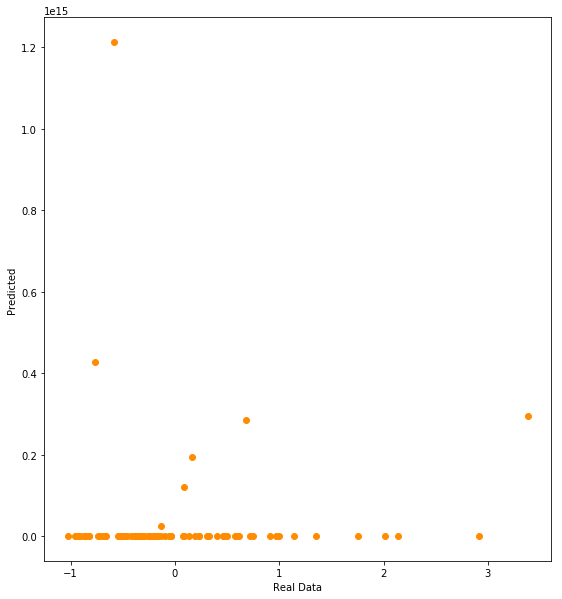

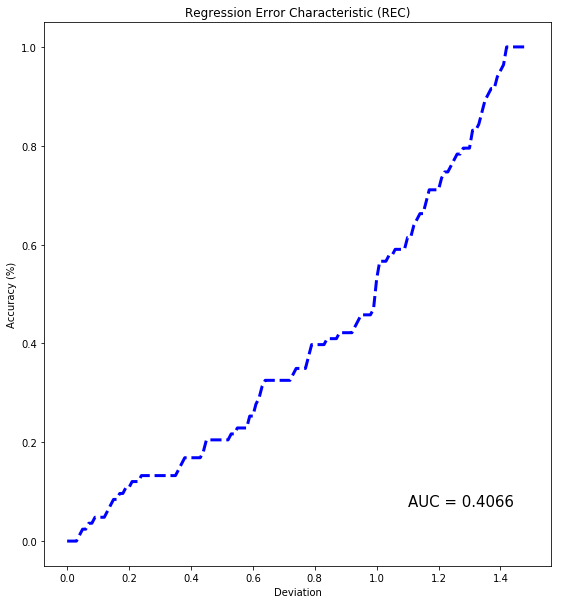

In [24]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [27]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20,25,30,50]
epochs = [10, 30,50,100]

In [28]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               2190336   
_________________________________________________________________
dense_56 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_57 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
220/220 [==============================] - 1s 3ms/sample - loss: 1.4293 - mean_absolute_error: 0.7

220/220 [==============================] - 1s 3ms/sample - loss: 1.6646 - mean_absolute_error: 0.9026
Epoch 2/30
220/220 [==============================] - 0s 2ms/sample - loss: 1.2267 - mean_absolute_error: 0.6955
Epoch 3/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.6705 - mean_absolute_error: 0.5584
Epoch 4/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.7270 - mean_absolute_error: 0.5538
Epoch 5/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.5031 - mean_absolute_error: 0.4334
Epoch 6/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.7129 - mean_absolute_error: 0.5092
Epoch 7/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.2711 - mean_absolute_error: 0.3377
Epoch 8/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.2951 - mean_absolute_error: 0.3147
Epoch 9/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.5530 - mean_absolute_error: 0

220/220 [==============================] - 0s 396us/sample - loss: 0.0108 - mean_absolute_error: 0.0684
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 128)               2190336   
_________________________________________________________________
dense_81 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_82 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_83 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch

Epoch 22/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0519 - mean_absolute_error: 0.0891
Epoch 23/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0853 - mean_absolute_error: 0.0932
Epoch 24/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0524 - mean_absolute_error: 0.0802
Epoch 25/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0634 - mean_absolute_error: 0.0960
Epoch 26/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.1755 - mean_absolute_error: 0.1004
Epoch 27/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0322 - mean_absolute_error: 0.0741
Epoch 28/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0322 - mean_absolute_error: 0.0744
Epoch 29/50
220/220 [==============================] - 1s 2ms/sample - loss: 0.0318 - mean_absolute_error: 0.0779
Epoch 30/50
220/220 [==============================] - 1s 2ms/sample - loss: 0.0312 - me

220/220 [==============================] - 0s 2ms/sample - loss: 0.1126 - mean_absolute_error: 0.1197
Epoch 34/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0872 - mean_absolute_error: 0.0984
Epoch 35/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0840 - mean_absolute_error: 0.1361
Epoch 36/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0505 - mean_absolute_error: 0.1397
Epoch 37/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0426 - mean_absolute_error: 0.1174
Epoch 38/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0946 - mean_absolute_error: 0.1402
Epoch 39/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0483 - mean_absolute_error: 0.1323
Epoch 40/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0416 - mean_absolute_error: 0.1162
Epoch 41/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0676 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.1320 - mean_absolute_error: 0.1351
Epoch 45/50
220/220 [==============================] - 1s 2ms/sample - loss: 0.0492 - mean_absolute_error: 0.1205
Epoch 46/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0618 - mean_absolute_error: 0.1072
Epoch 47/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0363 - mean_absolute_error: 0.0907
Epoch 48/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0539 - mean_absolute_error: 0.0887
Epoch 49/50
220/220 [==============================] - 0s 2ms/sample - loss: 0.0364 - mean_absolute_error: 0.0834
Epoch 50/50
220/220 [==============================] - 0s 436us/sample - loss: 0.0196 - mean_absolute_error: 0.0580
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 128)               21

220/220 [==============================] - 0s 2ms/sample - loss: 0.1602 - mean_absolute_error: 0.1617
Epoch 55/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0741 - mean_absolute_error: 0.1348
Epoch 56/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0691 - mean_absolute_error: 0.1365
Epoch 57/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.1222 - mean_absolute_error: 0.1474
Epoch 58/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.1412 - mean_absolute_error: 0.1387
Epoch 59/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0236 - mean_absolute_error: 0.0843
Epoch 60/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0263 - mean_absolute_error: 0.0877
Epoch 61/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0678 - mean_absolute_error: 0.1088
Epoch 62/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0726 - mean_a

220/220 [==============================] - 0s 2ms/sample - loss: 0.0441 - mean_absolute_error: 0.1219
Epoch 15/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0389 - mean_absolute_error: 0.1087
Epoch 16/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0269 - mean_absolute_error: 0.0936
Epoch 17/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0317 - mean_absolute_error: 0.0900
Epoch 18/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0307 - mean_absolute_error: 0.1023
Epoch 19/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0431 - mean_absolute_error: 0.1004
Epoch 20/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0419 - mean_absolute_error: 0.1042
Epoch 21/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0214 - mean_absolute_error: 0.0878
Epoch 22/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0357 - mean_a

220/220 [==============================] - 0s 2ms/sample - loss: 0.0868 - mean_absolute_error: 0.2044
Epoch 86/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0953 - mean_absolute_error: 0.2043
Epoch 87/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0784 - mean_absolute_error: 0.1665
Epoch 88/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0456 - mean_absolute_error: 0.1307
Epoch 89/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0928 - mean_absolute_error: 0.1444
Epoch 90/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0563 - mean_absolute_error: 0.1418
Epoch 91/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0776 - mean_absolute_error: 0.1580
Epoch 92/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.1222 - mean_absolute_error: 0.1745
Epoch 93/100
220/220 [==============================] - 0s 2ms/sample - loss: 0.0991 - mean_a

220/220 [==============================] - 0s 2ms/sample - loss: 0.2052 - mean_absolute_error: 0.1275
Epoch 46/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.0885 - mean_absolute_error: 0.1085
Epoch 47/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.0762 - mean_absolute_error: 0.1037
Epoch 48/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.0534 - mean_absolute_error: 0.0944
Epoch 49/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.3455 - mean_absolute_error: 0.1476
Epoch 50/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.2897 - mean_absolute_error: 0.1884
Epoch 51/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.1137 - mean_absolute_error: 0.1467
Epoch 52/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.2601 - mean_absolute_error: 0.1920
Epoch 53/100
220/220 [==============================] - 1s 2ms/sample - loss: 0.3521 - mean_a

220/220 [==============================] - 0s 1ms/sample - loss: 0.5931 - mean_absolute_error: 0.4017
Epoch 6/10
220/220 [==============================] - 0s 1ms/sample - loss: 0.2564 - mean_absolute_error: 0.3380
Epoch 7/10
220/220 [==============================] - 0s 1ms/sample - loss: 0.7770 - mean_absolute_error: 0.4112
Epoch 8/10
220/220 [==============================] - 0s 1ms/sample - loss: 0.4038 - mean_absolute_error: 0.2794
Epoch 9/10
220/220 [==============================] - 0s 1ms/sample - loss: 0.2919 - mean_absolute_error: 0.2759
Epoch 10/10
220/220 [==============================] - 0s 233us/sample - loss: 0.3102 - mean_absolute_error: 0.2085
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_121 (Dense)            (None, 256)   

220/220 [==============================] - 0s 1ms/sample - loss: 0.0884 - mean_absolute_error: 0.1851
Epoch 15/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.0702 - mean_absolute_error: 0.1748
Epoch 16/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1472 - mean_absolute_error: 0.1468
Epoch 17/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.0805 - mean_absolute_error: 0.1300
Epoch 18/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1456 - mean_absolute_error: 0.1722
Epoch 19/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.3590 - mean_absolute_error: 0.2108
Epoch 20/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.2540 - mean_absolute_error: 0.1895
Epoch 21/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.0649 - mean_absolute_error: 0.1429
Epoch 22/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.6901 - mean_absolute_

220/220 [==============================] - 0s 1ms/sample - loss: 0.3893 - mean_absolute_error: 0.4609
Epoch 5/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.6642 - mean_absolute_error: 0.4712
Epoch 6/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.5346 - mean_absolute_error: 0.3768
Epoch 7/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.2630 - mean_absolute_error: 0.3320
Epoch 8/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1803 - mean_absolute_error: 0.2754
Epoch 9/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1892 - mean_absolute_error: 0.2692
Epoch 10/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.4150 - mean_absolute_error: 0.2687
Epoch 11/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1450 - mean_absolute_error: 0.2296
Epoch 12/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1395 - mean_absolute_error

220/220 [==============================] - 0s 1ms/sample - loss: 0.0642 - mean_absolute_error: 0.0900
Epoch 36/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.1808 - mean_absolute_error: 0.1397
Epoch 37/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.1359 - mean_absolute_error: 0.1386
Epoch 38/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0799 - mean_absolute_error: 0.1263
Epoch 39/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0184 - mean_absolute_error: 0.0721
Epoch 40/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0506 - mean_absolute_error: 0.0884
Epoch 41/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0345 - mean_absolute_error: 0.0760
Epoch 42/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0526 - mean_absolute_error: 0.1034
Epoch 43/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0239 - mean_absolute_

220/220 [==============================] - 0s 1ms/sample - loss: 0.0196 - mean_absolute_error: 0.0589
Epoch 47/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0126 - mean_absolute_error: 0.0604
Epoch 48/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0177 - mean_absolute_error: 0.0674
Epoch 49/50
220/220 [==============================] - 0s 1ms/sample - loss: 0.0155 - mean_absolute_error: 0.0610
Epoch 50/50
220/220 [==============================] - 0s 236us/sample - loss: 0.0275 - mean_absolute_error: 0.0747
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_156 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_157 (Dense)    

Epoch 1/100
220/220 [==============================] - 0s 2ms/sample - loss: 1.7473 - mean_absolute_error: 0.9015
Epoch 2/100
220/220 [==============================] - 0s 1ms/sample - loss: 1.4062 - mean_absolute_error: 0.7392
Epoch 3/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.8552 - mean_absolute_error: 0.6255
Epoch 4/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.4338 - mean_absolute_error: 0.4569
Epoch 5/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.4143 - mean_absolute_error: 0.3445
Epoch 6/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.2688 - mean_absolute_error: 0.2473
Epoch 7/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.2025 - mean_absolute_error: 0.2312
Epoch 8/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.1315 - mean_absolute_error: 0.2095
Epoch 9/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.2043 - me

220/220 [==============================] - 0s 1ms/sample - loss: 0.2554 - mean_absolute_error: 0.2377
Epoch 73/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.2226 - mean_absolute_error: 0.2440
Epoch 74/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.1503 - mean_absolute_error: 0.1722
Epoch 75/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.1119 - mean_absolute_error: 0.1431
Epoch 76/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.1341 - mean_absolute_error: 0.1317
Epoch 77/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0457 - mean_absolute_error: 0.1152
Epoch 78/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0684 - mean_absolute_error: 0.1084
Epoch 79/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0885 - mean_absolute_error: 0.1037
Epoch 80/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0820 - mean_a

220/220 [==============================] - 0s 1ms/sample - loss: 0.0029 - mean_absolute_error: 0.0345
Epoch 33/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0034 - mean_absolute_error: 0.0348
Epoch 34/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0076 - mean_absolute_error: 0.0411
Epoch 35/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0337 - mean_absolute_error: 0.0721
Epoch 36/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0425 - mean_absolute_error: 0.1108
Epoch 37/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0488 - mean_absolute_error: 0.1007
Epoch 38/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0180 - mean_absolute_error: 0.0884
Epoch 39/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0343 - mean_absolute_error: 0.0962
Epoch 40/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0305 - mean_a

Epoch 1/100
220/220 [==============================] - 0s 2ms/sample - loss: 1.6992 - mean_absolute_error: 0.9287
Epoch 2/100
220/220 [==============================] - 0s 1ms/sample - loss: 1.2692 - mean_absolute_error: 0.7618
Epoch 3/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.7797 - mean_absolute_error: 0.6232
Epoch 4/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.5728 - mean_absolute_error: 0.4602
Epoch 5/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.3725 - mean_absolute_error: 0.3902
Epoch 6/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.3687 - mean_absolute_error: 0.3931
Epoch 7/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.5668 - mean_absolute_error: 0.4024
Epoch 8/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.2854 - mean_absolute_error: 0.3296
Epoch 9/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.4173 - me

220/220 [==============================] - 0s 1ms/sample - loss: 0.0404 - mean_absolute_error: 0.0700
Epoch 73/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0397 - mean_absolute_error: 0.0812
Epoch 74/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0310 - mean_absolute_error: 0.0800
Epoch 75/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0212 - mean_absolute_error: 0.0676
Epoch 76/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0127 - mean_absolute_error: 0.0510
Epoch 77/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0098 - mean_absolute_error: 0.0452
Epoch 78/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0046 - mean_absolute_error: 0.0305
Epoch 79/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0033 - mean_absolute_error: 0.0272
Epoch 80/100
220/220 [==============================] - 0s 1ms/sample - loss: 0.0030 - mean_a

220/220 [==============================] - 0s 205us/sample - loss: 0.1036 - mean_absolute_error: 0.1841
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_185 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_186 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_187 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_188 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch

Epoch 1/30
220/220 [==============================] - 0s 1ms/sample - loss: 1.0310 - mean_absolute_error: 0.7698
Epoch 2/30
220/220 [==============================] - 0s 763us/sample - loss: 0.7566 - mean_absolute_error: 0.6349
Epoch 3/30
220/220 [==============================] - 0s 862us/sample - loss: 0.4207 - mean_absolute_error: 0.4648
Epoch 4/30
220/220 [==============================] - 0s 830us/sample - loss: 0.1738 - mean_absolute_error: 0.2966
Epoch 5/30
220/220 [==============================] - 0s 836us/sample - loss: 0.2480 - mean_absolute_error: 0.3390
Epoch 6/30
220/220 [==============================] - 0s 864us/sample - loss: 0.1086 - mean_absolute_error: 0.2219
Epoch 7/30
220/220 [==============================] - 0s 825us/sample - loss: 0.0841 - mean_absolute_error: 0.1789
Epoch 8/30
220/220 [==============================] - 0s 739us/sample - loss: 0.0986 - mean_absolute_error: 0.1947
Epoch 9/30
220/220 [==============================] - 0s 740us/sample - loss: 0.09

220/220 [==============================] - 0s 202us/sample - loss: 0.4524 - mean_absolute_error: 0.3419
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_206 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_207 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_208 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch

Epoch 1/50
220/220 [==============================] - 0s 1ms/sample - loss: 1.1541 - mean_absolute_error: 0.7797
Epoch 2/50
220/220 [==============================] - 0s 721us/sample - loss: 0.8703 - mean_absolute_error: 0.6828
Epoch 3/50
220/220 [==============================] - 0s 724us/sample - loss: 0.4162 - mean_absolute_error: 0.4609
Epoch 4/50
220/220 [==============================] - 0s 741us/sample - loss: 0.3016 - mean_absolute_error: 0.4101
Epoch 5/50
220/220 [==============================] - 0s 744us/sample - loss: 0.2100 - mean_absolute_error: 0.3408
Epoch 6/50
220/220 [==============================] - 0s 750us/sample - loss: 0.1470 - mean_absolute_error: 0.2694
Epoch 7/50
220/220 [==============================] - 0s 750us/sample - loss: 0.1163 - mean_absolute_error: 0.2320
Epoch 8/50
220/220 [==============================] - 0s 727us/sample - loss: 0.1215 - mean_absolute_error: 0.2050
Epoch 9/50
220/220 [==============================] - 0s 755us/sample - loss: 0.09

220/220 [==============================] - 0s 732us/sample - loss: 0.2480 - mean_absolute_error: 0.2513
Epoch 12/50
220/220 [==============================] - 0s 739us/sample - loss: 0.2780 - mean_absolute_error: 0.1953
Epoch 13/50
220/220 [==============================] - 0s 739us/sample - loss: 0.1015 - mean_absolute_error: 0.1607
Epoch 14/50
220/220 [==============================] - 0s 764us/sample - loss: 0.2958 - mean_absolute_error: 0.1858
Epoch 15/50
220/220 [==============================] - 0s 738us/sample - loss: 0.2307 - mean_absolute_error: 0.2026
Epoch 16/50
220/220 [==============================] - 0s 736us/sample - loss: 0.0640 - mean_absolute_error: 0.1626
Epoch 17/50
220/220 [==============================] - 0s 730us/sample - loss: 0.0579 - mean_absolute_error: 0.1357
Epoch 18/50
220/220 [==============================] - 0s 734us/sample - loss: 0.0595 - mean_absolute_error: 0.1097
Epoch 19/50
220/220 [==============================] - 0s 736us/sample - loss: 0.514

220/220 [==============================] - 0s 738us/sample - loss: 0.0207 - mean_absolute_error: 0.0705
Epoch 22/100
220/220 [==============================] - 0s 725us/sample - loss: 0.0061 - mean_absolute_error: 0.0520
Epoch 23/100
220/220 [==============================] - 0s 744us/sample - loss: 0.0114 - mean_absolute_error: 0.0415
Epoch 24/100
220/220 [==============================] - 0s 732us/sample - loss: 0.0206 - mean_absolute_error: 0.0530
Epoch 25/100
220/220 [==============================] - 0s 731us/sample - loss: 0.0092 - mean_absolute_error: 0.0523
Epoch 26/100
220/220 [==============================] - 0s 746us/sample - loss: 0.0219 - mean_absolute_error: 0.0681
Epoch 27/100
220/220 [==============================] - 0s 745us/sample - loss: 0.0289 - mean_absolute_error: 0.0789
Epoch 28/100
220/220 [==============================] - 0s 735us/sample - loss: 0.0678 - mean_absolute_error: 0.1235
Epoch 29/100
220/220 [==============================] - 0s 736us/sample - los

220/220 [==============================] - 0s 745us/sample - loss: 0.0061 - mean_absolute_error: 0.0245
Epoch 91/100
220/220 [==============================] - 0s 738us/sample - loss: 0.0065 - mean_absolute_error: 0.0323
Epoch 92/100
220/220 [==============================] - 0s 733us/sample - loss: 0.0051 - mean_absolute_error: 0.0309
Epoch 93/100
220/220 [==============================] - 0s 746us/sample - loss: 0.0089 - mean_absolute_error: 0.0370
Epoch 94/100
220/220 [==============================] - 0s 742us/sample - loss: 0.0078 - mean_absolute_error: 0.0366
Epoch 95/100
220/220 [==============================] - 0s 737us/sample - loss: 0.0132 - mean_absolute_error: 0.0434
Epoch 96/100
220/220 [==============================] - 0s 757us/sample - loss: 0.0076 - mean_absolute_error: 0.0354
Epoch 97/100
220/220 [==============================] - 0s 737us/sample - loss: 0.0154 - mean_absolute_error: 0.0399
Epoch 98/100
220/220 [==============================] - 0s 739us/sample - los

220/220 [==============================] - 0s 754us/sample - loss: 0.0282 - mean_absolute_error: 0.0826
Epoch 50/100
220/220 [==============================] - 0s 742us/sample - loss: 0.0116 - mean_absolute_error: 0.0523
Epoch 51/100
220/220 [==============================] - 0s 747us/sample - loss: 0.0199 - mean_absolute_error: 0.0605
Epoch 52/100
220/220 [==============================] - 0s 737us/sample - loss: 0.0113 - mean_absolute_error: 0.0539
Epoch 53/100
220/220 [==============================] - 0s 743us/sample - loss: 0.0231 - mean_absolute_error: 0.0557
Epoch 54/100
220/220 [==============================] - 0s 753us/sample - loss: 0.0233 - mean_absolute_error: 0.0667
Epoch 55/100
220/220 [==============================] - 0s 757us/sample - loss: 0.0226 - mean_absolute_error: 0.0543
Epoch 56/100
220/220 [==============================] - 0s 737us/sample - loss: 0.0078 - mean_absolute_error: 0.0470
Epoch 57/100
220/220 [==============================] - 0s 745us/sample - los

220/220 [==============================] - 0s 827us/sample - loss: 0.1754 - mean_absolute_error: 0.2658
Epoch 9/100
220/220 [==============================] - 0s 849us/sample - loss: 0.2940 - mean_absolute_error: 0.2516
Epoch 10/100
220/220 [==============================] - 0s 804us/sample - loss: 0.1464 - mean_absolute_error: 0.2344
Epoch 11/100
220/220 [==============================] - 0s 843us/sample - loss: 0.1555 - mean_absolute_error: 0.2477
Epoch 12/100
220/220 [==============================] - 0s 837us/sample - loss: 0.1460 - mean_absolute_error: 0.2301
Epoch 13/100
220/220 [==============================] - 0s 821us/sample - loss: 0.0645 - mean_absolute_error: 0.1619
Epoch 14/100
220/220 [==============================] - 0s 836us/sample - loss: 0.0430 - mean_absolute_error: 0.1321
Epoch 15/100
220/220 [==============================] - 0s 807us/sample - loss: 0.0269 - mean_absolute_error: 0.0936
Epoch 16/100
220/220 [==============================] - 0s 782us/sample - loss

220/220 [==============================] - 0s 788us/sample - loss: 0.2020 - mean_absolute_error: 0.0726
Epoch 79/100
220/220 [==============================] - 0s 848us/sample - loss: 0.2000 - mean_absolute_error: 0.0610
Epoch 80/100
220/220 [==============================] - 0s 833us/sample - loss: 0.1785 - mean_absolute_error: 0.0500
Epoch 81/100
220/220 [==============================] - 0s 821us/sample - loss: 0.1457 - mean_absolute_error: 0.0461
Epoch 82/100
220/220 [==============================] - 0s 834us/sample - loss: 0.0775 - mean_absolute_error: 0.0362
Epoch 83/100
220/220 [==============================] - 0s 835us/sample - loss: 0.0049 - mean_absolute_error: 0.0191
Epoch 84/100
220/220 [==============================] - 0s 809us/sample - loss: 0.0519 - mean_absolute_error: 0.0276
Epoch 85/100
220/220 [==============================] - 0s 802us/sample - loss: 0.0444 - mean_absolute_error: 0.0278
Epoch 86/100
220/220 [==============================] - 0s 812us/sample - los

Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 1.7166 - mean_absolute_error: 0.9561
Epoch 2/10
220/220 [==============================] - 0s 722us/sample - loss: 0.8706 - mean_absolute_error: 0.6912
Epoch 3/10
220/220 [==============================] - 0s 742us/sample - loss: 0.6778 - mean_absolute_error: 0.5668
Epoch 4/10
220/220 [==============================] - 0s 678us/sample - loss: 0.3631 - mean_absolute_error: 0.3612
Epoch 5/10
220/220 [==============================] - 0s 722us/sample - loss: 0.4271 - mean_absolute_error: 0.3178
Epoch 6/10
220/220 [==============================] - 0s 699us/sample - loss: 0.1730 - mean_absolute_error: 0.2657
Epoch 7/10
220/220 [==============================] - 0s 694us/sample - loss: 0.1894 - mean_absolute_error: 0.2232
Epoch 8/10
220/220 [==============================] - 0s 728us/sample - loss: 0.1010 - mean_absolute_error: 0.1890
Epoch 9/10
220/220 [==============================] - 0s 704us/sample - loss: 0.13

220/220 [==============================] - 0s 644us/sample - loss: 0.0302 - mean_absolute_error: 0.1185
Epoch 11/30
220/220 [==============================] - 0s 578us/sample - loss: 0.0301 - mean_absolute_error: 0.0979
Epoch 12/30
220/220 [==============================] - 0s 566us/sample - loss: 0.0182 - mean_absolute_error: 0.0822
Epoch 13/30
220/220 [==============================] - 0s 569us/sample - loss: 0.0167 - mean_absolute_error: 0.0745
Epoch 14/30
220/220 [==============================] - 0s 566us/sample - loss: 0.0156 - mean_absolute_error: 0.0688
Epoch 15/30
220/220 [==============================] - 0s 629us/sample - loss: 0.0217 - mean_absolute_error: 0.0829
Epoch 16/30
220/220 [==============================] - 0s 678us/sample - loss: 0.0348 - mean_absolute_error: 0.1040
Epoch 17/30
220/220 [==============================] - 0s 649us/sample - loss: 0.0197 - mean_absolute_error: 0.0981
Epoch 18/30
220/220 [==============================] - 0s 656us/sample - loss: 0.014

Epoch 1/50
220/220 [==============================] - 0s 1ms/sample - loss: 1.5822 - mean_absolute_error: 0.8863
Epoch 2/50
220/220 [==============================] - 0s 570us/sample - loss: 1.2229 - mean_absolute_error: 0.7632
Epoch 3/50
220/220 [==============================] - 0s 597us/sample - loss: 0.6240 - mean_absolute_error: 0.5588
Epoch 4/50
220/220 [==============================] - 0s 661us/sample - loss: 0.4574 - mean_absolute_error: 0.3777
Epoch 5/50
220/220 [==============================] - 0s 662us/sample - loss: 0.4583 - mean_absolute_error: 0.3737
Epoch 6/50
220/220 [==============================] - 0s 579us/sample - loss: 0.1377 - mean_absolute_error: 0.2483
Epoch 7/50
220/220 [==============================] - 0s 583us/sample - loss: 0.0626 - mean_absolute_error: 0.1774
Epoch 8/50
220/220 [==============================] - 0s 645us/sample - loss: 0.0430 - mean_absolute_error: 0.1467
Epoch 9/50
220/220 [==============================] - 0s 675us/sample - loss: 0.03

220/220 [==============================] - 0s 603us/sample - loss: 0.0109 - mean_absolute_error: 0.0721
Epoch 12/50
220/220 [==============================] - 0s 670us/sample - loss: 0.0099 - mean_absolute_error: 0.0710
Epoch 13/50
220/220 [==============================] - 0s 611us/sample - loss: 0.0108 - mean_absolute_error: 0.0696
Epoch 14/50
220/220 [==============================] - 0s 632us/sample - loss: 0.0150 - mean_absolute_error: 0.0753
Epoch 15/50
220/220 [==============================] - 0s 617us/sample - loss: 0.0132 - mean_absolute_error: 0.0679
Epoch 16/50
220/220 [==============================] - 0s 641us/sample - loss: 0.0218 - mean_absolute_error: 0.0837
Epoch 17/50
220/220 [==============================] - 0s 562us/sample - loss: 0.0155 - mean_absolute_error: 0.0882
Epoch 18/50
220/220 [==============================] - 0s 560us/sample - loss: 0.0363 - mean_absolute_error: 0.1086
Epoch 19/50
220/220 [==============================] - 0s 599us/sample - loss: 0.058

220/220 [==============================] - 0s 571us/sample - loss: 0.0502 - mean_absolute_error: 0.1324
Epoch 21/50
220/220 [==============================] - 0s 571us/sample - loss: 0.0337 - mean_absolute_error: 0.1252
Epoch 22/50
220/220 [==============================] - 0s 573us/sample - loss: 0.0518 - mean_absolute_error: 0.1260
Epoch 23/50
220/220 [==============================] - 0s 570us/sample - loss: 0.0358 - mean_absolute_error: 0.1189
Epoch 24/50
220/220 [==============================] - 0s 566us/sample - loss: 0.0926 - mean_absolute_error: 0.1222
Epoch 25/50
220/220 [==============================] - 0s 564us/sample - loss: 0.0475 - mean_absolute_error: 0.1342
Epoch 26/50
220/220 [==============================] - 0s 566us/sample - loss: 0.0917 - mean_absolute_error: 0.1524
Epoch 27/50
220/220 [==============================] - 0s 561us/sample - loss: 0.1429 - mean_absolute_error: 0.1836
Epoch 28/50
220/220 [==============================] - 0s 577us/sample - loss: 0.385

Epoch 30/100
220/220 [==============================] - 0s 674us/sample - loss: 0.0295 - mean_absolute_error: 0.1139
Epoch 31/100
220/220 [==============================] - 0s 714us/sample - loss: 0.0316 - mean_absolute_error: 0.1152
Epoch 32/100
220/220 [==============================] - 0s 692us/sample - loss: 0.0217 - mean_absolute_error: 0.0941
Epoch 33/100
220/220 [==============================] - 0s 698us/sample - loss: 0.0246 - mean_absolute_error: 0.0935
Epoch 34/100
220/220 [==============================] - 0s 708us/sample - loss: 0.0394 - mean_absolute_error: 0.0982
Epoch 35/100
220/220 [==============================] - 0s 639us/sample - loss: 0.0725 - mean_absolute_error: 0.1352
Epoch 36/100
220/220 [==============================] - 0s 628us/sample - loss: 0.0403 - mean_absolute_error: 0.1231
Epoch 37/100
220/220 [==============================] - 0s 619us/sample - loss: 0.0386 - mean_absolute_error: 0.1261
Epoch 38/100
220/220 [==============================] - 0s 659us

220/220 [==============================] - 0s 677us/sample - loss: 4.0571e-04 - mean_absolute_error: 0.0045
Epoch 100/100
220/220 [==============================] - 0s 197us/sample - loss: 4.6054e-04 - mean_absolute_error: 0.0070
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_286 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_287 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_288 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_289 (Dense)            (None, 1)                 257       
Total params: 2,355,2

220/220 [==============================] - 0s 634us/sample - loss: 0.0272 - mean_absolute_error: 0.0977
Epoch 59/100
220/220 [==============================] - 0s 631us/sample - loss: 0.0400 - mean_absolute_error: 0.1165
Epoch 60/100
220/220 [==============================] - 0s 649us/sample - loss: 0.0413 - mean_absolute_error: 0.1217
Epoch 61/100
220/220 [==============================] - 0s 650us/sample - loss: 0.0210 - mean_absolute_error: 0.1023
Epoch 62/100
220/220 [==============================] - 0s 644us/sample - loss: 0.0248 - mean_absolute_error: 0.1001
Epoch 63/100
220/220 [==============================] - 0s 632us/sample - loss: 0.0415 - mean_absolute_error: 0.1056
Epoch 64/100
220/220 [==============================] - 0s 659us/sample - loss: 0.0336 - mean_absolute_error: 0.0980
Epoch 65/100
220/220 [==============================] - 0s 653us/sample - loss: 0.0625 - mean_absolute_error: 0.1173
Epoch 66/100
220/220 [==============================] - 0s 665us/sample - los

220/220 [==============================] - 0s 624us/sample - loss: 0.1627 - mean_absolute_error: 0.1394
Epoch 18/100
220/220 [==============================] - 0s 648us/sample - loss: 0.1922 - mean_absolute_error: 0.1916
Epoch 19/100
220/220 [==============================] - 0s 615us/sample - loss: 0.1744 - mean_absolute_error: 0.1560
Epoch 20/100
220/220 [==============================] - 0s 621us/sample - loss: 0.0977 - mean_absolute_error: 0.1476
Epoch 21/100
220/220 [==============================] - 0s 605us/sample - loss: 0.0405 - mean_absolute_error: 0.1245
Epoch 22/100
220/220 [==============================] - 0s 620us/sample - loss: 0.3137 - mean_absolute_error: 0.1486
Epoch 23/100
220/220 [==============================] - 0s 618us/sample - loss: 0.2670 - mean_absolute_error: 0.1976
Epoch 24/100
220/220 [==============================] - 0s 656us/sample - loss: 0.2065 - mean_absolute_error: 0.1618
Epoch 25/100
220/220 [==============================] - 0s 647us/sample - los

220/220 [==============================] - 0s 589us/sample - loss: 0.0423 - mean_absolute_error: 0.0835
Epoch 88/100
220/220 [==============================] - 0s 621us/sample - loss: 0.0147 - mean_absolute_error: 0.0750
Epoch 89/100
220/220 [==============================] - 0s 580us/sample - loss: 0.0170 - mean_absolute_error: 0.0755
Epoch 90/100
220/220 [==============================] - 0s 566us/sample - loss: 0.0117 - mean_absolute_error: 0.0631
Epoch 91/100
220/220 [==============================] - 0s 571us/sample - loss: 0.0142 - mean_absolute_error: 0.0663
Epoch 92/100
220/220 [==============================] - 0s 566us/sample - loss: 0.0089 - mean_absolute_error: 0.0570
Epoch 93/100
220/220 [==============================] - 0s 571us/sample - loss: 0.0125 - mean_absolute_error: 0.0608
Epoch 94/100
220/220 [==============================] - 0s 576us/sample - loss: 0.0122 - mean_absolute_error: 0.0526
Epoch 95/100
220/220 [==============================] - 0s 571us/sample - los

220/220 [==============================] - 0s 510us/sample - loss: 0.1757 - mean_absolute_error: 0.2762
Epoch 7/10
220/220 [==============================] - 0s 509us/sample - loss: 0.1200 - mean_absolute_error: 0.2129
Epoch 8/10
220/220 [==============================] - 0s 498us/sample - loss: 0.0962 - mean_absolute_error: 0.1790
Epoch 9/10
220/220 [==============================] - 0s 500us/sample - loss: 0.0485 - mean_absolute_error: 0.1400
Epoch 10/10
220/220 [==============================] - 0s 156us/sample - loss: 0.0338 - mean_absolute_error: 0.1264
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_310 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_311 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_312 (Dense

220/220 [==============================] - 0s 500us/sample - loss: 0.0111 - mean_absolute_error: 0.0641
Epoch 16/30
220/220 [==============================] - 0s 480us/sample - loss: 0.0094 - mean_absolute_error: 0.0594
Epoch 17/30
220/220 [==============================] - 0s 480us/sample - loss: 0.0070 - mean_absolute_error: 0.0551
Epoch 18/30
220/220 [==============================] - 0s 475us/sample - loss: 0.0073 - mean_absolute_error: 0.0571
Epoch 19/30
220/220 [==============================] - 0s 486us/sample - loss: 0.0056 - mean_absolute_error: 0.0476
Epoch 20/30
220/220 [==============================] - 0s 472us/sample - loss: 0.0051 - mean_absolute_error: 0.0498
Epoch 21/30
220/220 [==============================] - 0s 481us/sample - loss: 0.0049 - mean_absolute_error: 0.0440
Epoch 22/30
220/220 [==============================] - 0s 487us/sample - loss: 0.0040 - mean_absolute_error: 0.0409
Epoch 23/30
220/220 [==============================] - 0s 476us/sample - loss: 0.009

220/220 [==============================] - 0s 519us/sample - loss: 0.5164 - mean_absolute_error: 0.3986
Epoch 5/50
220/220 [==============================] - 0s 495us/sample - loss: 0.2985 - mean_absolute_error: 0.3667
Epoch 6/50
220/220 [==============================] - 0s 495us/sample - loss: 0.2542 - mean_absolute_error: 0.3458
Epoch 7/50
220/220 [==============================] - 0s 496us/sample - loss: 0.1575 - mean_absolute_error: 0.2658
Epoch 8/50
220/220 [==============================] - 0s 489us/sample - loss: 0.1172 - mean_absolute_error: 0.2126
Epoch 9/50
220/220 [==============================] - 0s 496us/sample - loss: 0.1191 - mean_absolute_error: 0.2018
Epoch 10/50
220/220 [==============================] - 0s 488us/sample - loss: 0.1626 - mean_absolute_error: 0.1982
Epoch 11/50
220/220 [==============================] - 0s 493us/sample - loss: 0.0586 - mean_absolute_error: 0.1789
Epoch 12/50
220/220 [==============================] - 0s 487us/sample - loss: 0.0588 - m

220/220 [==============================] - 0s 543us/sample - loss: 0.0124 - mean_absolute_error: 0.0884
Epoch 15/50
220/220 [==============================] - 0s 485us/sample - loss: 0.0161 - mean_absolute_error: 0.0823
Epoch 16/50
220/220 [==============================] - 0s 523us/sample - loss: 0.0131 - mean_absolute_error: 0.0830
Epoch 17/50
220/220 [==============================] - 0s 499us/sample - loss: 0.0286 - mean_absolute_error: 0.0800
Epoch 18/50
220/220 [==============================] - 0s 478us/sample - loss: 0.0324 - mean_absolute_error: 0.0842
Epoch 19/50
220/220 [==============================] - 0s 538us/sample - loss: 0.0134 - mean_absolute_error: 0.0687
Epoch 20/50
220/220 [==============================] - 0s 559us/sample - loss: 0.0109 - mean_absolute_error: 0.0624
Epoch 21/50
220/220 [==============================] - 0s 515us/sample - loss: 0.0074 - mean_absolute_error: 0.0531
Epoch 22/50
220/220 [==============================] - 0s 508us/sample - loss: 0.003

220/220 [==============================] - 0s 496us/sample - loss: 0.0063 - mean_absolute_error: 0.0492
Epoch 25/50
220/220 [==============================] - 0s 489us/sample - loss: 0.0299 - mean_absolute_error: 0.0607
Epoch 26/50
220/220 [==============================] - 0s 494us/sample - loss: 0.0412 - mean_absolute_error: 0.0516
Epoch 27/50
220/220 [==============================] - 0s 492us/sample - loss: 0.0235 - mean_absolute_error: 0.0808
Epoch 28/50
220/220 [==============================] - 0s 497us/sample - loss: 0.0667 - mean_absolute_error: 0.0885
Epoch 29/50
220/220 [==============================] - 0s 486us/sample - loss: 0.0145 - mean_absolute_error: 0.0655
Epoch 30/50
220/220 [==============================] - 0s 498us/sample - loss: 0.0266 - mean_absolute_error: 0.0655
Epoch 31/50
220/220 [==============================] - 0s 493us/sample - loss: 0.0475 - mean_absolute_error: 0.0616
Epoch 32/50
220/220 [==============================] - 0s 492us/sample - loss: 0.019

Epoch 34/100
220/220 [==============================] - 0s 496us/sample - loss: 0.0079 - mean_absolute_error: 0.0494
Epoch 35/100
220/220 [==============================] - 0s 507us/sample - loss: 0.0286 - mean_absolute_error: 0.0756
Epoch 36/100
220/220 [==============================] - 0s 501us/sample - loss: 0.0161 - mean_absolute_error: 0.0801
Epoch 37/100
220/220 [==============================] - 0s 507us/sample - loss: 0.0431 - mean_absolute_error: 0.1181
Epoch 38/100
220/220 [==============================] - 0s 510us/sample - loss: 0.0280 - mean_absolute_error: 0.1100
Epoch 39/100
220/220 [==============================] - 0s 504us/sample - loss: 0.0427 - mean_absolute_error: 0.1173
Epoch 40/100
220/220 [==============================] - 0s 502us/sample - loss: 0.0386 - mean_absolute_error: 0.1221
Epoch 41/100
220/220 [==============================] - 0s 507us/sample - loss: 0.0980 - mean_absolute_error: 0.1381
Epoch 42/100
220/220 [==============================] - 0s 503us

Epoch 1/100
220/220 [==============================] - 0s 1ms/sample - loss: 1.0091 - mean_absolute_error: 0.7484
Epoch 2/100
220/220 [==============================] - 0s 528us/sample - loss: 0.6165 - mean_absolute_error: 0.5697
Epoch 3/100
220/220 [==============================] - 0s 524us/sample - loss: 0.4215 - mean_absolute_error: 0.4762
Epoch 4/100
220/220 [==============================] - 0s 526us/sample - loss: 0.3178 - mean_absolute_error: 0.3835
Epoch 5/100
220/220 [==============================] - 0s 520us/sample - loss: 0.1212 - mean_absolute_error: 0.2553
Epoch 6/100
220/220 [==============================] - 0s 526us/sample - loss: 0.1126 - mean_absolute_error: 0.2236
Epoch 7/100
220/220 [==============================] - 0s 530us/sample - loss: 0.1164 - mean_absolute_error: 0.2165
Epoch 8/100
220/220 [==============================] - 0s 521us/sample - loss: 0.0561 - mean_absolute_error: 0.1627
Epoch 9/100
220/220 [==============================] - 0s 528us/sample - l

220/220 [==============================] - 0s 528us/sample - loss: 0.0263 - mean_absolute_error: 0.1197
Epoch 72/100
220/220 [==============================] - 0s 530us/sample - loss: 0.0371 - mean_absolute_error: 0.1276
Epoch 73/100
220/220 [==============================] - 0s 520us/sample - loss: 0.0480 - mean_absolute_error: 0.1405
Epoch 74/100
220/220 [==============================] - 0s 525us/sample - loss: 0.1060 - mean_absolute_error: 0.1876
Epoch 75/100
220/220 [==============================] - 0s 526us/sample - loss: 0.0516 - mean_absolute_error: 0.1498
Epoch 76/100
220/220 [==============================] - 0s 533us/sample - loss: 0.0775 - mean_absolute_error: 0.1846
Epoch 77/100
220/220 [==============================] - 0s 537us/sample - loss: 0.0474 - mean_absolute_error: 0.1515
Epoch 78/100
220/220 [==============================] - 0s 562us/sample - loss: 0.0330 - mean_absolute_error: 0.1184
Epoch 79/100
220/220 [==============================] - 0s 530us/sample - los

220/220 [==============================] - 0s 535us/sample - loss: 0.0223 - mean_absolute_error: 0.0921
Epoch 31/100
220/220 [==============================] - 0s 555us/sample - loss: 0.0263 - mean_absolute_error: 0.1140
Epoch 32/100
220/220 [==============================] - 0s 543us/sample - loss: 0.0318 - mean_absolute_error: 0.1315
Epoch 33/100
220/220 [==============================] - 0s 562us/sample - loss: 0.0539 - mean_absolute_error: 0.1584
Epoch 34/100
220/220 [==============================] - 0s 559us/sample - loss: 0.0598 - mean_absolute_error: 0.1715
Epoch 35/100
220/220 [==============================] - 0s 637us/sample - loss: 0.1186 - mean_absolute_error: 0.1824
Epoch 36/100
220/220 [==============================] - 0s 571us/sample - loss: 0.0860 - mean_absolute_error: 0.1954
Epoch 37/100
220/220 [==============================] - 0s 600us/sample - loss: 0.1989 - mean_absolute_error: 0.2265
Epoch 38/100
220/220 [==============================] - 0s 556us/sample - los

220/220 [==============================] - 0s 148us/sample - loss: 0.0148 - mean_absolute_error: 0.0818
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_356 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_357 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_358 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_359 (Dense)            (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch

Epoch 1/30
220/220 [==============================] - 0s 1ms/sample - loss: 1.4466 - mean_absolute_error: 0.8235
Epoch 2/30
220/220 [==============================] - 0s 454us/sample - loss: 0.8723 - mean_absolute_error: 0.6171
Epoch 3/30
220/220 [==============================] - 0s 446us/sample - loss: 0.5155 - mean_absolute_error: 0.4903
Epoch 4/30
220/220 [==============================] - 0s 464us/sample - loss: 0.9165 - mean_absolute_error: 0.6872
Epoch 5/30
220/220 [==============================] - 0s 462us/sample - loss: 0.6234 - mean_absolute_error: 0.5290
Epoch 6/30
220/220 [==============================] - 0s 462us/sample - loss: 0.2978 - mean_absolute_error: 0.3960
Epoch 7/30
220/220 [==============================] - 0s 465us/sample - loss: 0.1531 - mean_absolute_error: 0.2510
Epoch 8/30
220/220 [==============================] - 0s 462us/sample - loss: 0.0903 - mean_absolute_error: 0.1834
Epoch 9/30
220/220 [==============================] - 0s 454us/sample - loss: 0.02

220/220 [==============================] - 0s 166us/sample - loss: 0.0018 - mean_absolute_error: 0.0309
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_381 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_382 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_383 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_384 (Dense)            (None, 1)                 257       
Total params: 2,355,201
Trainable params: 2,355,201
Non-trainable params: 0
_________________________________________________________________
Epoch

220/220 [==============================] - 0s 476us/sample - loss: 0.0257 - mean_absolute_error: 0.0773
Epoch 21/50
220/220 [==============================] - 0s 461us/sample - loss: 0.0112 - mean_absolute_error: 0.0508
Epoch 22/50
220/220 [==============================] - 0s 452us/sample - loss: 0.0146 - mean_absolute_error: 0.0471
Epoch 23/50
220/220 [==============================] - 0s 463us/sample - loss: 0.0071 - mean_absolute_error: 0.0363
Epoch 24/50
220/220 [==============================] - 0s 463us/sample - loss: 0.0076 - mean_absolute_error: 0.0384
Epoch 25/50
220/220 [==============================] - 0s 464us/sample - loss: 0.0070 - mean_absolute_error: 0.0393
Epoch 26/50
220/220 [==============================] - 0s 455us/sample - loss: 0.0038 - mean_absolute_error: 0.0317
Epoch 27/50
220/220 [==============================] - 0s 452us/sample - loss: 0.0043 - mean_absolute_error: 0.0373
Epoch 28/50
220/220 [==============================] - 0s 466us/sample - loss: 0.002

220/220 [==============================] - 0s 449us/sample - loss: 0.0962 - mean_absolute_error: 0.1642
Epoch 31/50
220/220 [==============================] - 0s 466us/sample - loss: 0.0479 - mean_absolute_error: 0.1325
Epoch 32/50
220/220 [==============================] - 0s 455us/sample - loss: 0.0558 - mean_absolute_error: 0.1314
Epoch 33/50
220/220 [==============================] - 0s 460us/sample - loss: 0.0275 - mean_absolute_error: 0.1070
Epoch 34/50
220/220 [==============================] - 0s 460us/sample - loss: 0.0313 - mean_absolute_error: 0.0969
Epoch 35/50
220/220 [==============================] - 0s 468us/sample - loss: 0.0138 - mean_absolute_error: 0.0820
Epoch 36/50
220/220 [==============================] - 0s 451us/sample - loss: 0.0110 - mean_absolute_error: 0.0749
Epoch 37/50
220/220 [==============================] - 0s 452us/sample - loss: 0.0055 - mean_absolute_error: 0.0579
Epoch 38/50
220/220 [==============================] - 0s 452us/sample - loss: 0.004

Epoch 40/50
220/220 [==============================] - 0s 446us/sample - loss: 0.0159 - mean_absolute_error: 0.0574
Epoch 41/50
220/220 [==============================] - 0s 457us/sample - loss: 0.0277 - mean_absolute_error: 0.0559
Epoch 42/50
220/220 [==============================] - 0s 449us/sample - loss: 0.1313 - mean_absolute_error: 0.1069
Epoch 43/50
220/220 [==============================] - 0s 453us/sample - loss: 0.1327 - mean_absolute_error: 0.1040
Epoch 44/50
220/220 [==============================] - 0s 457us/sample - loss: 0.0618 - mean_absolute_error: 0.0656
Epoch 45/50
220/220 [==============================] - 0s 459us/sample - loss: 0.0194 - mean_absolute_error: 0.0657
Epoch 46/50
220/220 [==============================] - 0s 474us/sample - loss: 0.0106 - mean_absolute_error: 0.0546
Epoch 47/50
220/220 [==============================] - 0s 451us/sample - loss: 0.0060 - mean_absolute_error: 0.0439
Epoch 48/50
220/220 [==============================] - 0s 460us/sample -

220/220 [==============================] - 0s 654us/sample - loss: 0.0103 - mean_absolute_error: 0.0764
Epoch 50/100
220/220 [==============================] - 0s 573us/sample - loss: 0.0145 - mean_absolute_error: 0.0837
Epoch 51/100
220/220 [==============================] - 0s 593us/sample - loss: 0.0106 - mean_absolute_error: 0.0699
Epoch 52/100
220/220 [==============================] - 0s 601us/sample - loss: 0.0099 - mean_absolute_error: 0.0658
Epoch 53/100
220/220 [==============================] - 0s 695us/sample - loss: 0.0145 - mean_absolute_error: 0.0783
Epoch 54/100
220/220 [==============================] - 0s 519us/sample - loss: 0.0260 - mean_absolute_error: 0.0907
Epoch 55/100
220/220 [==============================] - 0s 558us/sample - loss: 0.0233 - mean_absolute_error: 0.0944
Epoch 56/100
220/220 [==============================] - 0s 607us/sample - loss: 0.0313 - mean_absolute_error: 0.1060
Epoch 57/100
220/220 [==============================] - 0s 553us/sample - los

220/220 [==============================] - 0s 489us/sample - loss: 0.0736 - mean_absolute_error: 0.1869
Epoch 9/100
220/220 [==============================] - 0s 539us/sample - loss: 0.0747 - mean_absolute_error: 0.1702
Epoch 10/100
220/220 [==============================] - 0s 496us/sample - loss: 0.0352 - mean_absolute_error: 0.1394
Epoch 11/100
220/220 [==============================] - 0s 496us/sample - loss: 0.0260 - mean_absolute_error: 0.1171
Epoch 12/100
220/220 [==============================] - 0s 503us/sample - loss: 0.0258 - mean_absolute_error: 0.1086
Epoch 13/100
220/220 [==============================] - 0s 534us/sample - loss: 0.0150 - mean_absolute_error: 0.0833
Epoch 14/100
220/220 [==============================] - 0s 532us/sample - loss: 0.0089 - mean_absolute_error: 0.0658
Epoch 15/100
220/220 [==============================] - 0s 525us/sample - loss: 0.0117 - mean_absolute_error: 0.0508
Epoch 16/100
220/220 [==============================] - 0s 516us/sample - loss

220/220 [==============================] - 0s 460us/sample - loss: 0.0953 - mean_absolute_error: 0.1154
Epoch 79/100
220/220 [==============================] - 0s 491us/sample - loss: 0.0659 - mean_absolute_error: 0.1171
Epoch 80/100
220/220 [==============================] - 0s 535us/sample - loss: 0.0313 - mean_absolute_error: 0.0821
Epoch 81/100
220/220 [==============================] - 0s 520us/sample - loss: 0.0591 - mean_absolute_error: 0.0790
Epoch 82/100
220/220 [==============================] - 0s 509us/sample - loss: 0.0245 - mean_absolute_error: 0.0705
Epoch 83/100
220/220 [==============================] - 0s 499us/sample - loss: 0.0506 - mean_absolute_error: 0.0636
Epoch 84/100
220/220 [==============================] - 0s 485us/sample - loss: 0.0204 - mean_absolute_error: 0.0505
Epoch 85/100
220/220 [==============================] - 0s 509us/sample - loss: 0.0099 - mean_absolute_error: 0.0415
Epoch 86/100
220/220 [==============================] - 0s 500us/sample - los

220/220 [==============================] - 0s 467us/sample - loss: 0.0404 - mean_absolute_error: 0.1205
Epoch 38/100
220/220 [==============================] - 0s 458us/sample - loss: 0.0466 - mean_absolute_error: 0.1247
Epoch 39/100
220/220 [==============================] - 0s 455us/sample - loss: 0.0378 - mean_absolute_error: 0.1107
Epoch 40/100
220/220 [==============================] - 0s 455us/sample - loss: 0.0416 - mean_absolute_error: 0.1155
Epoch 41/100
220/220 [==============================] - 0s 459us/sample - loss: 0.0277 - mean_absolute_error: 0.1100
Epoch 42/100
220/220 [==============================] - 0s 459us/sample - loss: 0.0336 - mean_absolute_error: 0.1107
Epoch 43/100
220/220 [==============================] - 0s 451us/sample - loss: 0.0324 - mean_absolute_error: 0.1118
Epoch 44/100
220/220 [==============================] - 0s 448us/sample - loss: 0.0219 - mean_absolute_error: 0.0840
Epoch 45/100
220/220 [==============================] - 0s 461us/sample - los

Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 1.5945 - mean_absolute_error: 0.8845
Epoch 2/10
220/220 [==============================] - 0s 341us/sample - loss: 0.8772 - mean_absolute_error: 0.7250
Epoch 3/10
220/220 [==============================] - 0s 344us/sample - loss: 0.4577 - mean_absolute_error: 0.4829
Epoch 4/10
220/220 [==============================] - 0s 346us/sample - loss: 0.2553 - mean_absolute_error: 0.3651
Epoch 5/10
220/220 [==============================] - 0s 340us/sample - loss: 0.2213 - mean_absolute_error: 0.3348
Epoch 6/10
220/220 [==============================] - 0s 344us/sample - loss: 0.2209 - mean_absolute_error: 0.3072
Epoch 7/10
220/220 [==============================] - 0s 338us/sample - loss: 0.1899 - mean_absolute_error: 0.2753
Epoch 8/10
220/220 [==============================] - 0s 347us/sample - loss: 0.0654 - mean_absolute_error: 0.1782
Epoch 9/10
220/220 [==============================] - 0s 344us/sample - loss: 0.06

220/220 [==============================] - 0s 349us/sample - loss: 0.0534 - mean_absolute_error: 0.1702
Epoch 11/30
220/220 [==============================] - 0s 367us/sample - loss: 0.1177 - mean_absolute_error: 0.1505
Epoch 12/30
220/220 [==============================] - 0s 366us/sample - loss: 0.0771 - mean_absolute_error: 0.1850
Epoch 13/30
220/220 [==============================] - 0s 351us/sample - loss: 0.0220 - mean_absolute_error: 0.0964
Epoch 14/30
220/220 [==============================] - 0s 359us/sample - loss: 0.0370 - mean_absolute_error: 0.1235
Epoch 15/30
220/220 [==============================] - 0s 357us/sample - loss: 0.0128 - mean_absolute_error: 0.0688
Epoch 16/30
220/220 [==============================] - 0s 357us/sample - loss: 0.0101 - mean_absolute_error: 0.0677
Epoch 17/30
220/220 [==============================] - 0s 368us/sample - loss: 0.0074 - mean_absolute_error: 0.0467
Epoch 18/30
220/220 [==============================] - 0s 357us/sample - loss: 0.003

Epoch 1/30
220/220 [==============================] - 0s 921us/sample - loss: 1.8360 - mean_absolute_error: 0.9887
Epoch 2/30
220/220 [==============================] - 0s 348us/sample - loss: 1.0276 - mean_absolute_error: 0.7538
Epoch 3/30
220/220 [==============================] - 0s 341us/sample - loss: 0.4763 - mean_absolute_error: 0.4891
Epoch 4/30
220/220 [==============================] - 0s 344us/sample - loss: 0.3122 - mean_absolute_error: 0.3671
Epoch 5/30
220/220 [==============================] - 0s 342us/sample - loss: 0.2746 - mean_absolute_error: 0.2892
Epoch 6/30
220/220 [==============================] - 0s 340us/sample - loss: 0.0846 - mean_absolute_error: 0.2255
Epoch 7/30
220/220 [==============================] - 0s 345us/sample - loss: 0.0768 - mean_absolute_error: 0.2045
Epoch 8/30
220/220 [==============================] - 0s 346us/sample - loss: 0.0737 - mean_absolute_error: 0.2072
Epoch 9/30
220/220 [==============================] - 0s 350us/sample - loss: 0.

220/220 [==============================] - 0s 362us/sample - loss: 0.0010 - mean_absolute_error: 0.0207
Epoch 31/50
220/220 [==============================] - 0s 358us/sample - loss: 0.0022 - mean_absolute_error: 0.0250
Epoch 32/50
220/220 [==============================] - 0s 342us/sample - loss: 0.0026 - mean_absolute_error: 0.0240
Epoch 33/50
220/220 [==============================] - 0s 343us/sample - loss: 9.0423e-04 - mean_absolute_error: 0.0179
Epoch 34/50
220/220 [==============================] - 0s 348us/sample - loss: 8.6420e-04 - mean_absolute_error: 0.0222
Epoch 35/50
220/220 [==============================] - 0s 346us/sample - loss: 9.7921e-04 - mean_absolute_error: 0.0191
Epoch 36/50
220/220 [==============================] - 0s 348us/sample - loss: 8.1334e-04 - mean_absolute_error: 0.0145
Epoch 37/50
220/220 [==============================] - 0s 350us/sample - loss: 0.0012 - mean_absolute_error: 0.0152
Epoch 38/50
220/220 [==============================] - 0s 350us/samp

220/220 [==============================] - 0s 347us/sample - loss: 7.2250e-04 - mean_absolute_error: 0.0147
Epoch 40/50
220/220 [==============================] - 0s 349us/sample - loss: 5.8607e-04 - mean_absolute_error: 0.0149
Epoch 41/50
220/220 [==============================] - 0s 357us/sample - loss: 9.8213e-04 - mean_absolute_error: 0.0201
Epoch 42/50
220/220 [==============================] - 0s 355us/sample - loss: 5.8074e-04 - mean_absolute_error: 0.0153
Epoch 43/50
220/220 [==============================] - 0s 343us/sample - loss: 4.1385e-04 - mean_absolute_error: 0.0119
Epoch 44/50
220/220 [==============================] - 0s 353us/sample - loss: 0.0010 - mean_absolute_error: 0.0172
Epoch 45/50
220/220 [==============================] - 0s 352us/sample - loss: 5.9651e-04 - mean_absolute_error: 0.0185
Epoch 46/50
220/220 [==============================] - 0s 349us/sample - loss: 6.2824e-04 - mean_absolute_error: 0.0153
Epoch 47/50
220/220 [==============================] - 0

220/220 [==============================] - 0s 364us/sample - loss: 0.0036 - mean_absolute_error: 0.0409
Epoch 49/50
220/220 [==============================] - 0s 372us/sample - loss: 0.0143 - mean_absolute_error: 0.0460
Epoch 50/50
220/220 [==============================] - 0s 137us/sample - loss: 0.0042 - mean_absolute_error: 0.0366
Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_460 (Dense)            (None, 128)               2190336   
_________________________________________________________________
dense_461 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_462 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_463 (Dense)            (None, 256)               65792     
_______________________________________________

Epoch 57/100
220/220 [==============================] - 0s 350us/sample - loss: 3.4720e-04 - mean_absolute_error: 0.0082
Epoch 58/100
220/220 [==============================] - 0s 346us/sample - loss: 1.7465e-04 - mean_absolute_error: 0.0075
Epoch 59/100
220/220 [==============================] - 0s 352us/sample - loss: 3.4989e-04 - mean_absolute_error: 0.0074
Epoch 60/100
220/220 [==============================] - 0s 357us/sample - loss: 1.7611e-04 - mean_absolute_error: 0.0081
Epoch 61/100
220/220 [==============================] - 0s 348us/sample - loss: 5.0758e-04 - mean_absolute_error: 0.0080
Epoch 62/100
220/220 [==============================] - 0s 347us/sample - loss: 1.4442e-04 - mean_absolute_error: 0.0068
Epoch 63/100
220/220 [==============================] - 0s 349us/sample - loss: 0.0011 - mean_absolute_error: 0.0115
Epoch 64/100
220/220 [==============================] - 0s 350us/sample - loss: 1.5641e-04 - mean_absolute_error: 0.0083
Epoch 65/100
220/220 [==============

220/220 [==============================] - 0s 359us/sample - loss: 0.0095 - mean_absolute_error: 0.0692
Epoch 17/100
220/220 [==============================] - 0s 374us/sample - loss: 0.0052 - mean_absolute_error: 0.0485
Epoch 18/100
220/220 [==============================] - 0s 347us/sample - loss: 0.0077 - mean_absolute_error: 0.0521
Epoch 19/100
220/220 [==============================] - 0s 347us/sample - loss: 0.0078 - mean_absolute_error: 0.0562
Epoch 20/100
220/220 [==============================] - 0s 350us/sample - loss: 0.0042 - mean_absolute_error: 0.0415
Epoch 21/100
220/220 [==============================] - 0s 351us/sample - loss: 0.0019 - mean_absolute_error: 0.0295
Epoch 22/100
220/220 [==============================] - 0s 343us/sample - loss: 0.0016 - mean_absolute_error: 0.0256
Epoch 23/100
220/220 [==============================] - 0s 348us/sample - loss: 0.0024 - mean_absolute_error: 0.0280
Epoch 24/100
220/220 [==============================] - 0s 356us/sample - los

220/220 [==============================] - 0s 338us/sample - loss: 0.0223 - mean_absolute_error: 0.0715
Epoch 86/100
220/220 [==============================] - 0s 364us/sample - loss: 0.0154 - mean_absolute_error: 0.0674
Epoch 87/100
220/220 [==============================] - 0s 346us/sample - loss: 0.0077 - mean_absolute_error: 0.0516
Epoch 88/100
220/220 [==============================] - 0s 348us/sample - loss: 0.0079 - mean_absolute_error: 0.0543
Epoch 89/100
220/220 [==============================] - 0s 349us/sample - loss: 0.0066 - mean_absolute_error: 0.0511
Epoch 90/100
220/220 [==============================] - 0s 349us/sample - loss: 0.0029 - mean_absolute_error: 0.0330
Epoch 91/100
220/220 [==============================] - 0s 350us/sample - loss: 0.0067 - mean_absolute_error: 0.0386
Epoch 92/100
220/220 [==============================] - 0s 352us/sample - loss: 0.0035 - mean_absolute_error: 0.0304
Epoch 93/100
220/220 [==============================] - 0s 346us/sample - los

220/220 [==============================] - 0s 342us/sample - loss: 2.0564e-04 - mean_absolute_error: 0.0065
Epoch 45/100
220/220 [==============================] - 0s 346us/sample - loss: 1.5326e-04 - mean_absolute_error: 0.0065
Epoch 46/100
220/220 [==============================] - 0s 336us/sample - loss: 8.9838e-05 - mean_absolute_error: 0.0049
Epoch 47/100
220/220 [==============================] - 0s 338us/sample - loss: 7.4461e-05 - mean_absolute_error: 0.0048
Epoch 48/100
220/220 [==============================] - 0s 340us/sample - loss: 1.0400e-04 - mean_absolute_error: 0.0047
Epoch 49/100
220/220 [==============================] - 0s 339us/sample - loss: 3.3536e-05 - mean_absolute_error: 0.0035
Epoch 50/100
220/220 [==============================] - 0s 342us/sample - loss: 6.9300e-05 - mean_absolute_error: 0.0040
Epoch 51/100
220/220 [==============================] - 0s 340us/sample - loss: 3.0694e-05 - mean_absolute_error: 0.0034
Epoch 52/100
220/220 [=======================

330/330 [==============================] - 0s 651us/sample - loss: 0.8018 - mean_absolute_error: 0.6156
Epoch 3/10
330/330 [==============================] - 0s 628us/sample - loss: 0.5761 - mean_absolute_error: 0.5217
Epoch 4/10
330/330 [==============================] - 0s 622us/sample - loss: 0.5949 - mean_absolute_error: 0.4774
Epoch 5/10
330/330 [==============================] - 0s 631us/sample - loss: 0.2406 - mean_absolute_error: 0.3435
Epoch 6/10
330/330 [==============================] - 0s 622us/sample - loss: 0.1970 - mean_absolute_error: 0.3136
Epoch 7/10
330/330 [==============================] - 0s 630us/sample - loss: 0.1680 - mean_absolute_error: 0.2643
Epoch 8/10
330/330 [==============================] - 0s 637us/sample - loss: 0.1433 - mean_absolute_error: 0.2108
Epoch 9/10
330/330 [==============================] - 0s 626us/sample - loss: 0.1247 - mean_absolute_error: 0.1854
Epoch 10/10
330/330 [==============================] - 0s 623us/sample - loss: 0.0815 - mea

In [29]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.050404 using {'batch_size': 20, 'epochs': 10}
-1.241700 (0.328443) with: {'batch_size': 5, 'epochs': 10}
-1.110920 (0.297094) with: {'batch_size': 5, 'epochs': 30}
-1.321543 (0.484619) with: {'batch_size': 5, 'epochs': 50}
-1.130270 (0.308333) with: {'batch_size': 5, 'epochs': 100}
-1.074981 (0.408385) with: {'batch_size': 10, 'epochs': 10}
-1.074549 (0.393052) with: {'batch_size': 10, 'epochs': 30}
-1.063173 (0.339616) with: {'batch_size': 10, 'epochs': 50}
-1.097214 (0.355023) with: {'batch_size': 10, 'epochs': 100}
-1.068698 (0.405135) with: {'batch_size': 15, 'epochs': 10}
-1.058400 (0.420550) with: {'batch_size': 15, 'epochs': 30}
-1.126886 (0.365642) with: {'batch_size': 15, 'epochs': 50}
-1.161477 (0.359158) with: {'batch_size': 15, 'epochs': 100}
-1.050404 (0.437890) with: {'batch_size': 20, 'epochs': 10}
-1.121483 (0.368356) with: {'batch_size': 20, 'epochs': 30}
-1.108895 (0.411464) with: {'batch_size': 20, 'epochs': 50}
-1.097228 (0.359724) with: {'batch_size': 20, 

In [30]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=20, epochs=10, verbose=True)

In [31]:
newmodel.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 966us/sample - loss: 1.4463 - mean_absolute_error: 0.8397
Epoch 2/10
330/330 [==============================] - 0s 593us/sample - loss: 0.8581 - mean_absolute_error: 0.6476
Epoch 3/10
330/330 [==============================] - 0s 611us/sample - loss: 0.5511 - mean_absolute_error: 0.5147
Epoch 4/10
330/330 [==============================] - 0s 599us/sample - loss: 0.6008 - mean_absolute_error: 0.4463
Epoch 5/10
330/330 [==============================] - 0s 600us/sample - loss: 0.2924 - mean_absolute_error: 0.3811
Epoch 6/10
330/330 [==============================] - 0s 602us/sample - loss: 0.3572 - mean_absolute_error: 0.3621
Epoch 7/10
330/330 [==============================] - 0s 595us/sample - loss: 0.1940 - mean_absolute_error: 0.2943
Epoch 8/10
330/330 [==============================] - 0s 602us/sample - loss: 0.2979 - mean_absolute_error: 0.2641
Epoch 9/10
330/330 [==============================] - 0s 622us/sample - loss: 0.

In [32]:
y_predval = newmodel.predict(X_val)

83/83 [==============================] - 0s 429us/sample


In [33]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

11243512839995.229
2.2487945520899596e+27
47421456663518.46
R2 Score
-3.227945152544792e+27


R^2 = -3227945152544792057185566720.0000


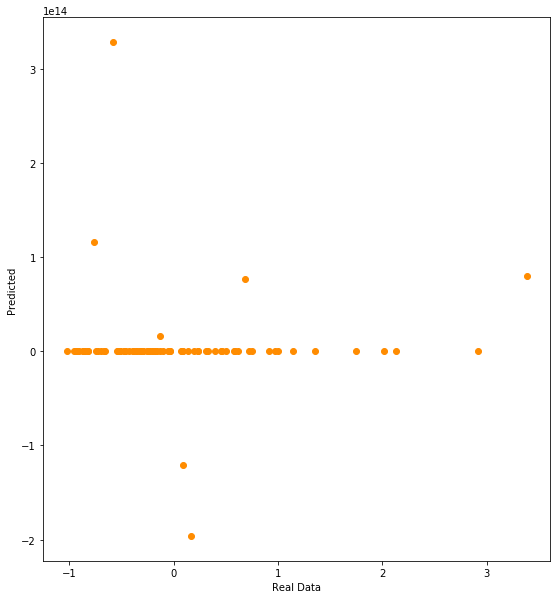

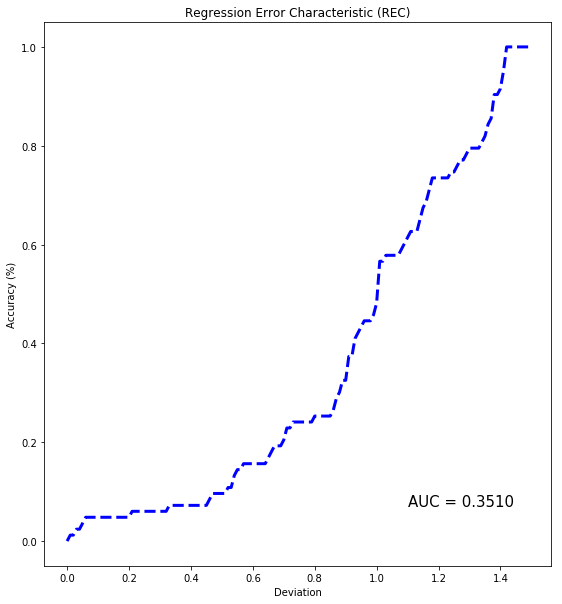

In [34]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()